# Importing Necessary Installed Libraries:

In [2]:
#importing installed packages (pip install package_name)
#to run current cell - (ctrl+enter), to run & move to next cell - (shift+enter)  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('punkt')
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth", 200)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sivar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Import (Data Collection):

In [3]:
# link: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
# downloading and importing the dataset (tweets.csv)
df = pd.read_csv('Tweets.csv')
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.tail(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
# to find no. of rows and columns in dataset
df.shape

(14640, 15)

In [6]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# Data Cleaning (Data Preprocessing):

In [7]:
#check for missing values
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
# dropping the unnecessary columns from the table
df = df.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1)
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [9]:
# renaming the columns in the table
df.columns = ['sentiment_label', 'tweets']
df.head()

,sentiment_label,tweets
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [10]:
# assigning value to the labels by creating a mapper() function (-1 -> negative , 0 -> neutral , 1 -> positive)
def mapper(sentiment_label):
    if sentiment_label == 'positive':
        return 2
    elif sentiment_label == 'neutral':
        return 1
    else:
        return 0
df['value_label'] = df['sentiment_label'].map(mapper)
#df = df.reindex(columns = ['sentiment_label', 'value_label', 'tweets'])
df.head()

,sentiment_label,tweets,value_label
0,neutral,@VirginAmerica What @dhepburn said.,1
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,2
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,1
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
4,negative,@VirginAmerica and it's a really big bad thing about it,0


In [11]:
#downloading and displaying stopwords for english language
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'again', 'too', 'wasn', 'while', 'y', 'shan', 'out', "shouldn't", 'mightn', 'will', "you'll", 'has', "wasn't", 'hadn', "didn't", 'by', 'ain', 'these', 'where', 'doesn', 'being', 'his', 'whom', 'very', 'can', 'just', 'which', 'both', 'who', 'as', 'doing', 'do', "aren't", 'shouldn', 'should', "should've", 'she', 'each', "couldn't", 'did', 'ours', 'been', 'most', 'him', 'after', 'haven', 'to', "mustn't", 's', "don't", 'my', "wouldn't", 'her', 'yourself', 'until', 'before', 'o', 'your', 'didn', "shan't", "mightn't", 'but', 'itself', 'don', 'i', 'having', "hasn't", 've', 'against', 'themselves', 'not', 'mustn', 'in', 'at', 'yours', 'won', 'what', 'down', 'aren', 'myself', 'wouldn', "haven't", 'had', 'when', 'he', 'the', "she's", 'ourselves', 'm', 'its', 'them', 'were', "that'll", 'all', 'up', 'hasn', 'was', 'off', 'their', 'am', 'weren', 'once', 't', 'll', 'nor', 'own', 'so', 'that', "hadn't", 're', 'through', 'd', 'be', 'some', 'further', 'needn', 'between', 'of', 'no', 'have', 'couldn', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sivar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# prepare for stemming/lemmatization - process of extracting the root words using snowball stemmer from nltk
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

In [13]:
#before cleaning
df.head()

,sentiment_label,tweets,value_label
0,neutral,@VirginAmerica What @dhepburn said.,1
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,2
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,1
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
4,negative,@VirginAmerica and it's a really big bad thing about it,0


In [14]:
def clean_the_tweet(text):
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
    
df = df[df['sentiment_label']!='neutral']
df['cleaned_tweet'] = df['tweets'].apply(clean_the_tweet)

df['sentiment_label'] = df['sentiment_label'].apply(lambda x: 1 if x =='positive' else 0)
df['cleaned_tweet'] = df['cleaned_tweet'].apply(text_process)
df.reset_index(drop=True, inplace = True)
df.head()

,sentiment_label,tweets,value_label,cleaned_tweet
0,1,@VirginAmerica plus you've added commercials to the experience... tacky.,2,added commercials experience tacky
1,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0,really aggressive blast obnoxious entertainment guests faces amp little recourse
2,0,@VirginAmerica and it's a really big bad thing about it,0,really big bad thing
3,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,0,would pay flight seats playing really bad thing flying va
4,1,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",2,nearly every time fly vx ear worm go away


In [15]:
# removing duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11536    False
11537    False
11538    False
11539    False
11540    False
Length: 11541, dtype: bool

In [16]:
# tokenization - splitting the given sentences into list of tokens, indexed or vectorized 
tokenized_tweet = df['cleaned_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                                        [added, commercials, experience, tacky]
1    [really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]
2                                                                      [really, big, bad, thing]
3                           [would, pay, flight, seats, playing, really, bad, thing, flying, va]
4                                            [nearly, every, time, fly, vx, ear, worm, go, away]
Name: cleaned_tweet, dtype: object

In [17]:
# stemming - to reduce the words into root words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(word) for word in x])
tokenized_tweet.head()

0                                                    [ad, commerci, experi, tacki]
1    [realli, aggress, blast, obnoxi, entertain, guest, face, amp, littl, recours]
2                                                        [realli, big, bad, thing]
3                    [would, pay, flight, seat, play, realli, bad, thing, fli, va]
4                              [nearli, everi, time, fli, vx, ear, worm, go, away]
Name: cleaned_tweet, dtype: object

In [18]:
#combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['cleaned_tweet'] = tokenized_tweet
df.head()

,sentiment_label,tweets,value_label,cleaned_tweet
0,1,@VirginAmerica plus you've added commercials to the experience... tacky.,2,ad commerci experi tacki
1,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0,realli aggress blast obnoxi entertain guest face amp littl recours
2,0,@VirginAmerica and it's a really big bad thing about it,0,realli big bad thing
3,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,0,would pay flight seat play realli bad thing fli va
4,1,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",2,nearli everi time fli vx ear worm go away


# Data Analysis:

In [30]:
# description about the dataset (summary statistics)
print("\nSummary Statics:")
df.describe()


Summary Statics:


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [31]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [34]:
#distribution of tweet location
print("\nDistribution of Tweet Location:")
counts = df['tweet_location'].value_counts().sort_index()
print(counts)


Distribution of Tweet Location:
tweet_location
  || san antonio, texas||    1
 Bronx, NY / Destin, Fl      1
 California 92705            1
 D(MD)V ✈️ NYC ✈️ Germany    1
 DC | Jersey City            1
                            ..
✡ Los Angeles ✡              1
✨                            1
❤                            2
サマセット、ニュージャージー州              1
명동서식 37.56638,126.984994     1
Name: count, Length: 3081, dtype: int64


In [35]:
#distribution of negativereason
print("\nDistribution of Negative Reason")
counts = df['negativereason'].value_counts()
print(counts)


Distribution of Negative Reason
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


In [37]:
#unique values identification
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [38]:
# label counts
print("\nDistribution of Sentiments:")
df['airline_sentiment'].value_counts()


Distribution of Sentiments:


airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

# Data Visualization:

<Axes: xlabel='airline_sentiment'>

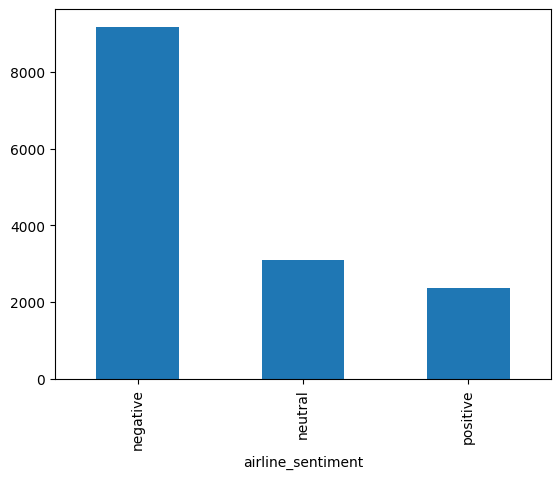

In [36]:
#plot the airline_sentiment counts
df['airline_sentiment'].value_counts().plot(kind='bar')

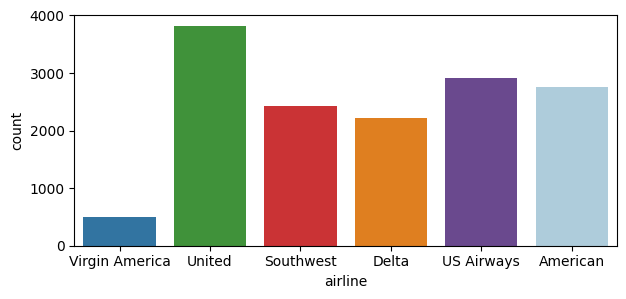

In [39]:
# Checking the distribution of airlines over several countries
plt.figure(figsize=(7,3))
sns.countplot(data=df,x='airline', palette=['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3'])
plt.show()

<Axes: xlabel='airline'>

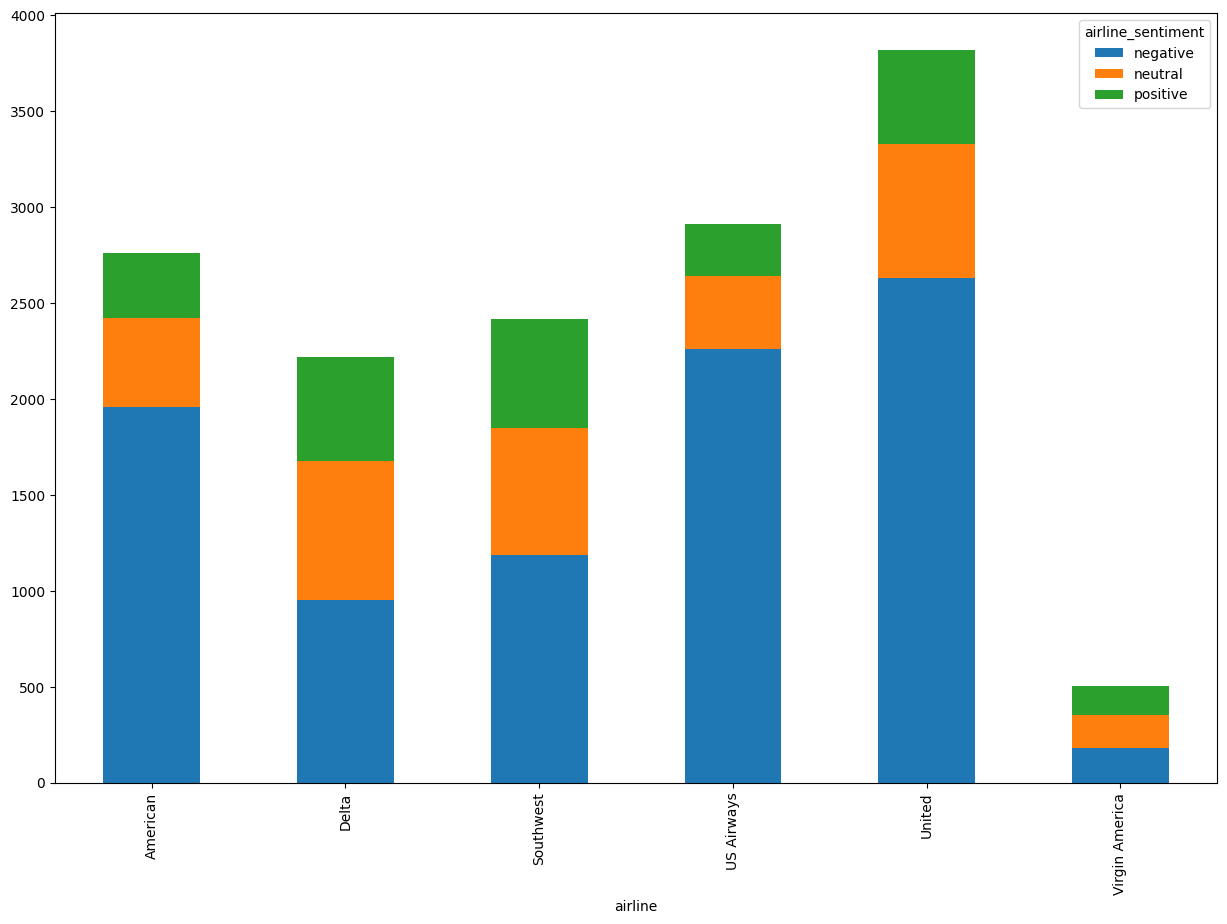

In [40]:
# grouping the distribution of postivie, negative, neutral sentiment_label for each country
figure_2 = df.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

<Axes: xlabel='retweet_count', ylabel='count'>

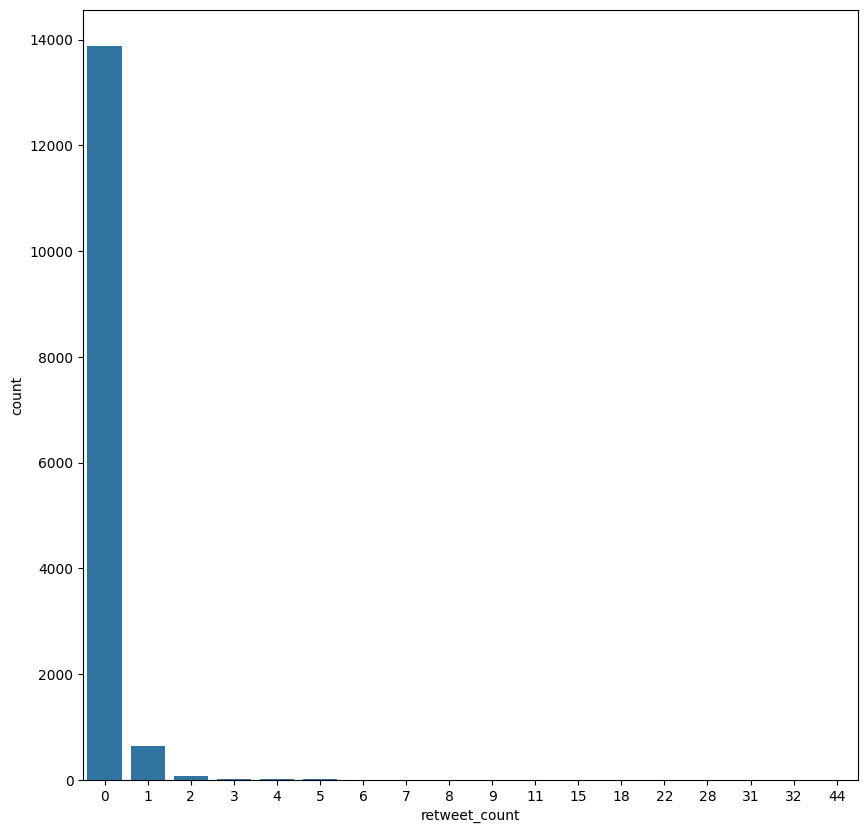

In [7]:
# distribution of retweet count across several countries
plt.figure(figsize=(10,10))
sns.countplot(x="retweet_count", data=df)

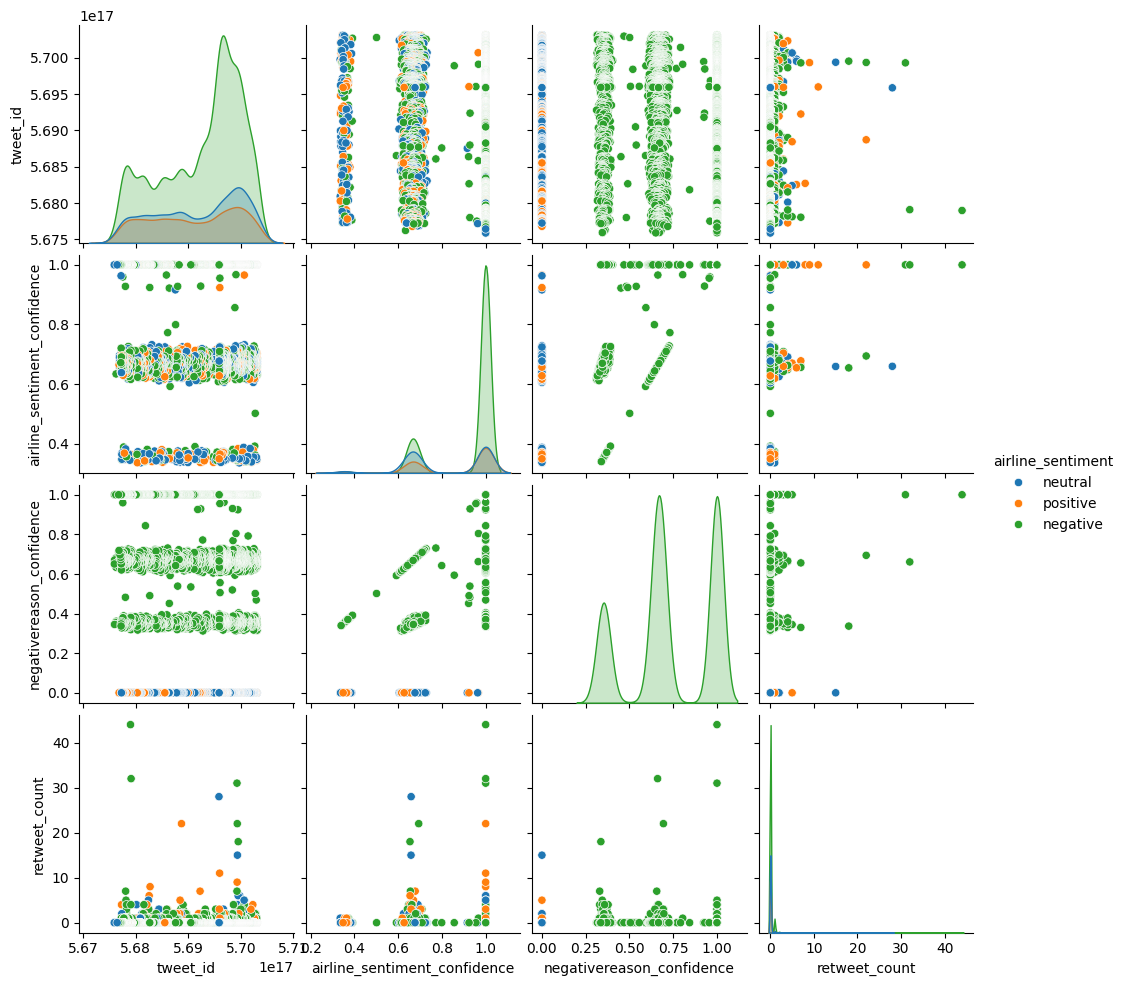

In [8]:
# visualization of all columns
sns.pairplot(df,hue='airline_sentiment')

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


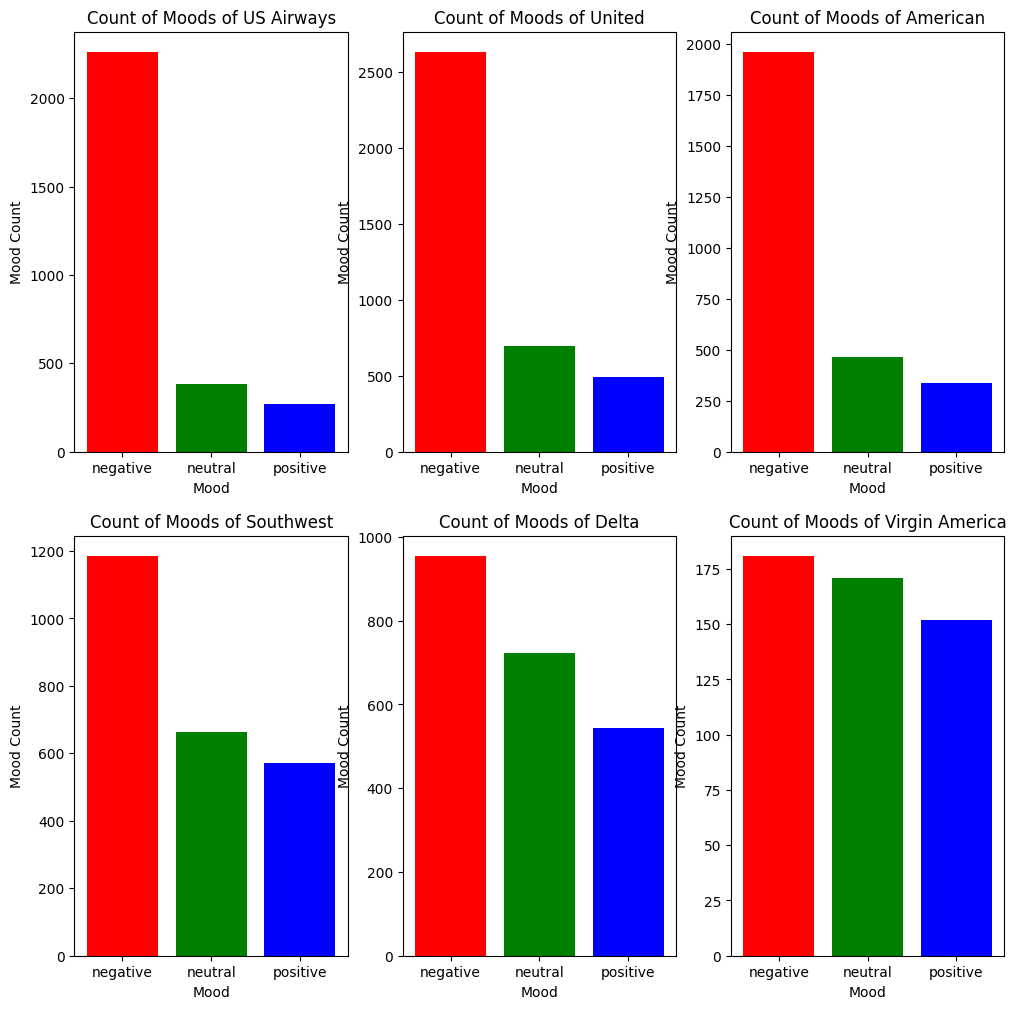

In [9]:
#count of moods of several countries
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

            Percent Negative
American            0.710402
Delta               0.429793
Southwest           0.490083
US Airways          0.776862
United              0.688906
Virgin              0.359127


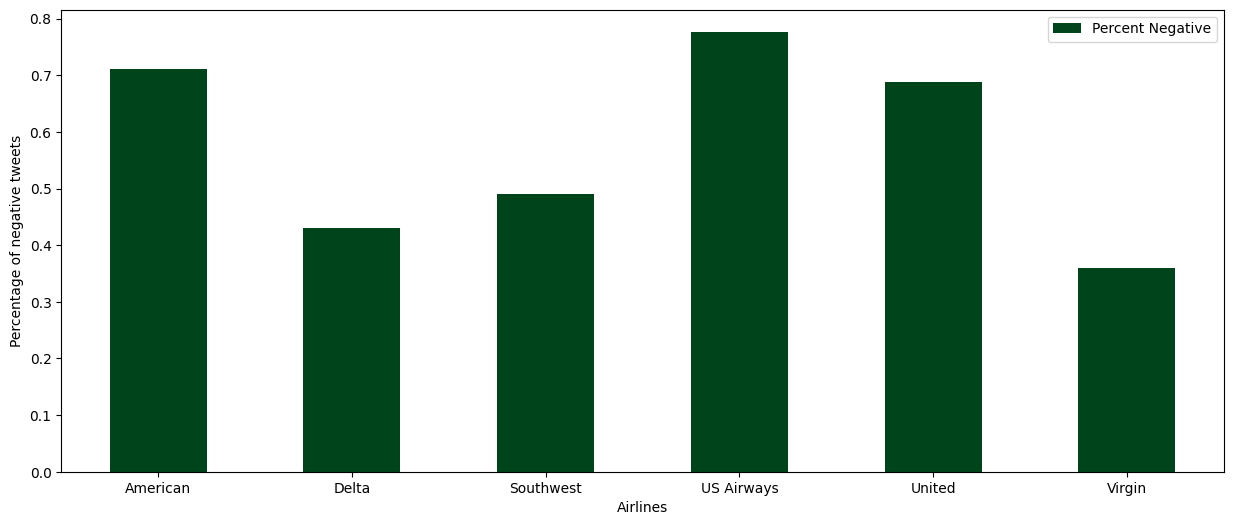

In [10]:
#distribution of negative tweets over airlines
neg_tweets = df.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = df.groupby(['airline'])['airline_sentiment'].count()

my_dict = {'American':neg_tweets[0] / total_tweets[0],'Delta':neg_tweets[3] / total_tweets[1],'Southwest': neg_tweets[6] / total_tweets[2],
'US Airways': neg_tweets[9] / total_tweets[3],'United': neg_tweets[12] / total_tweets[4],'Virgin': neg_tweets[15] / total_tweets[5]}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)
ax = perc.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')
plt.show()

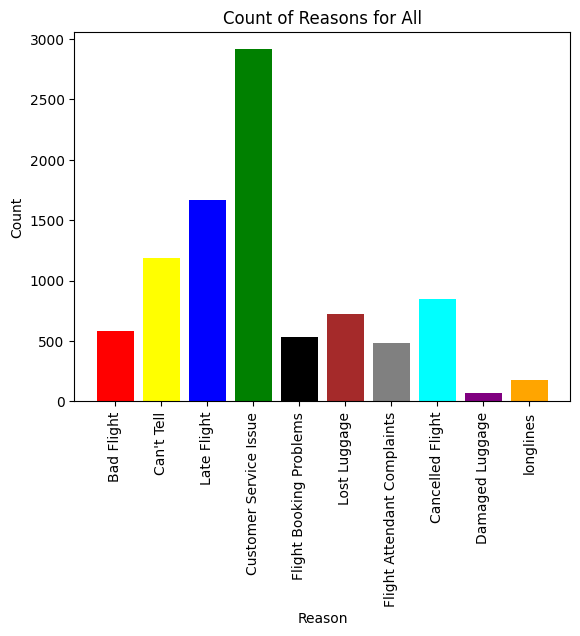

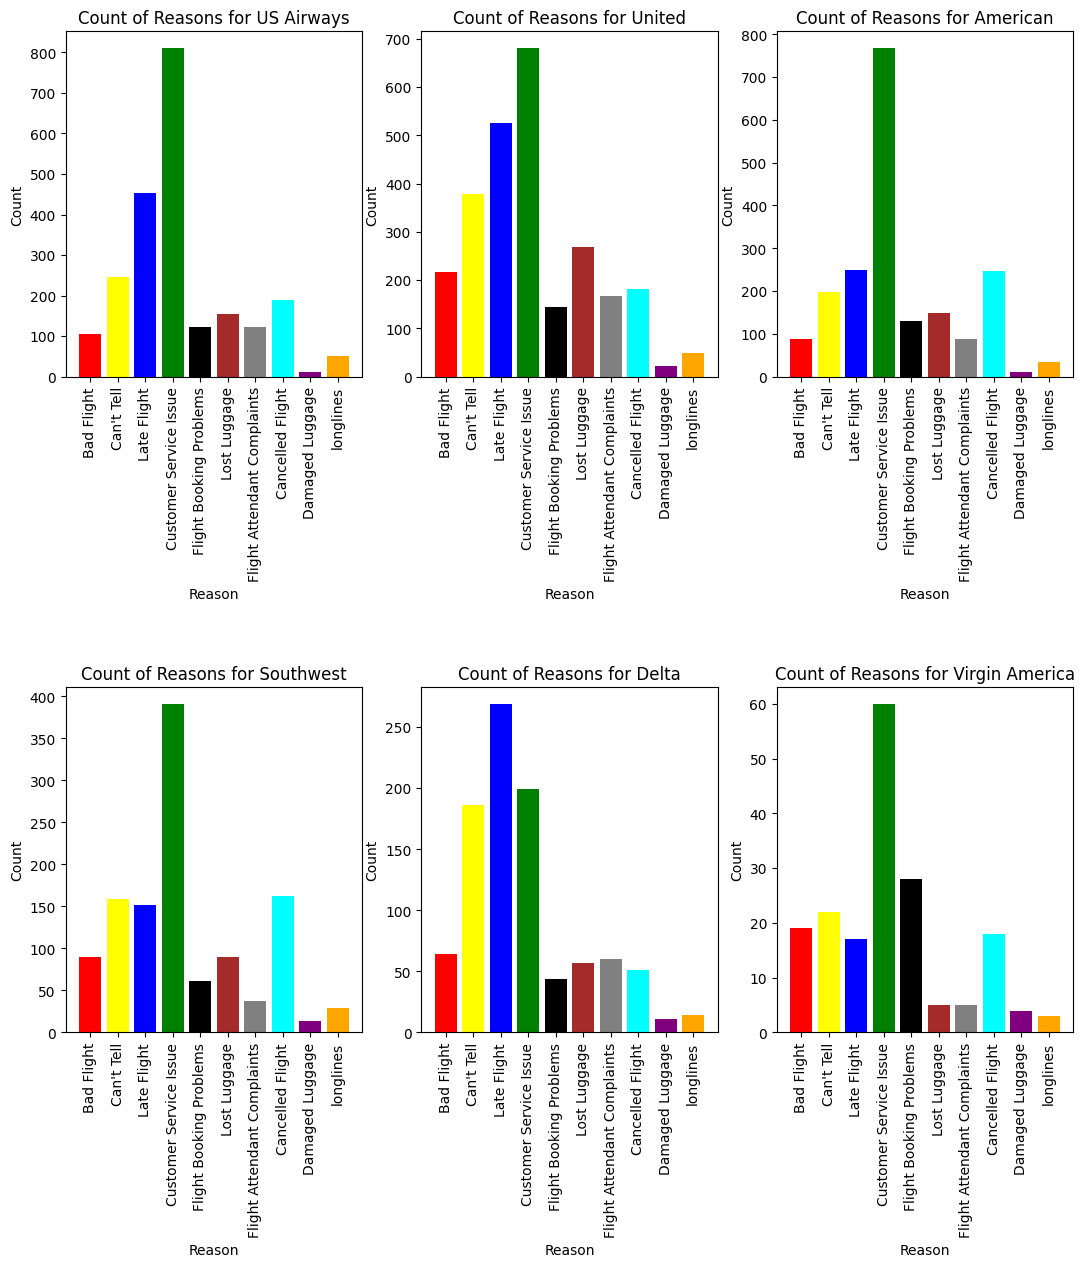

In [11]:
#count of reasons for all countries
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

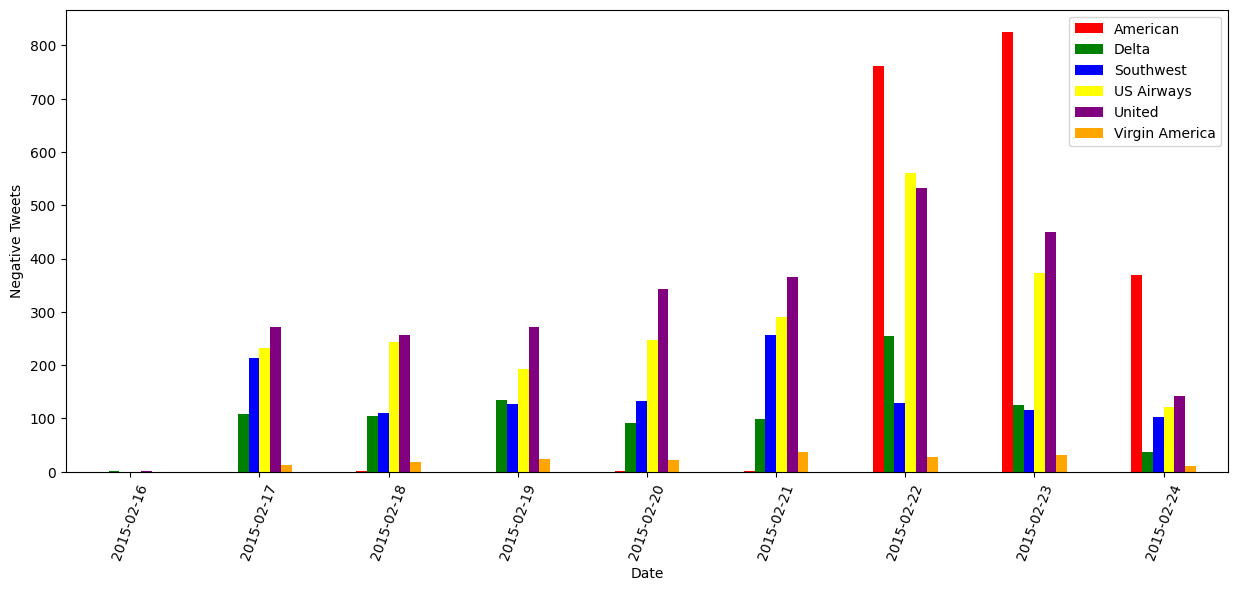

In [12]:
#grouping the date column and visualized the distribution of negative tweets over grouped date
date = df.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

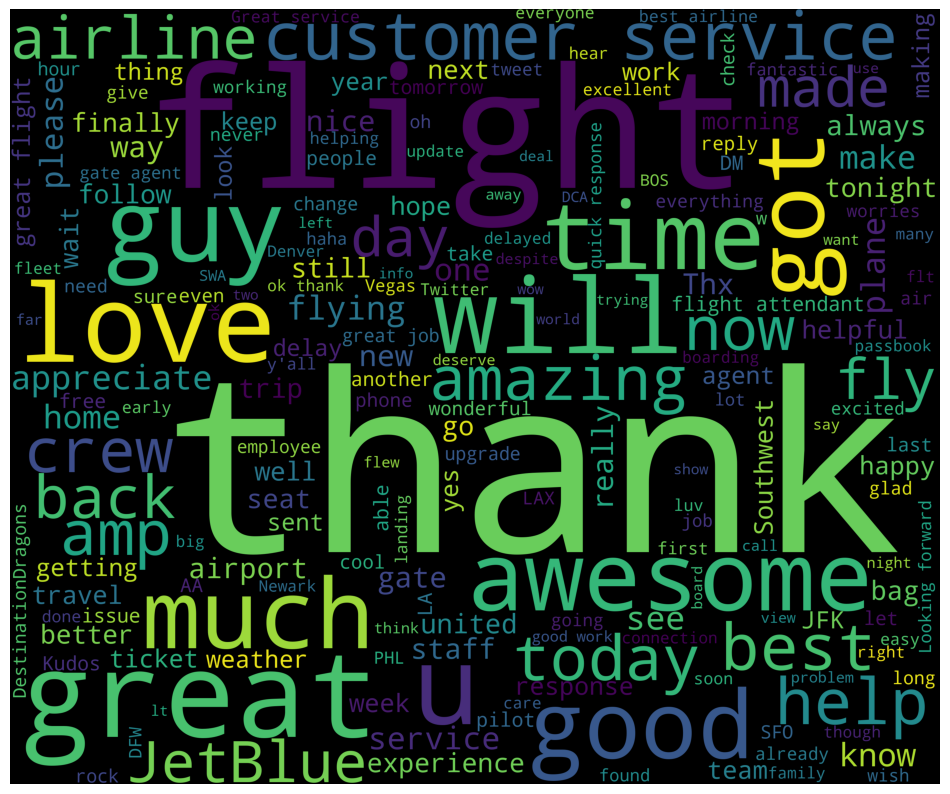

In [13]:
#visualize the frequent words for +ve
from wordcloud import WordCloud,STOPWORDS
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


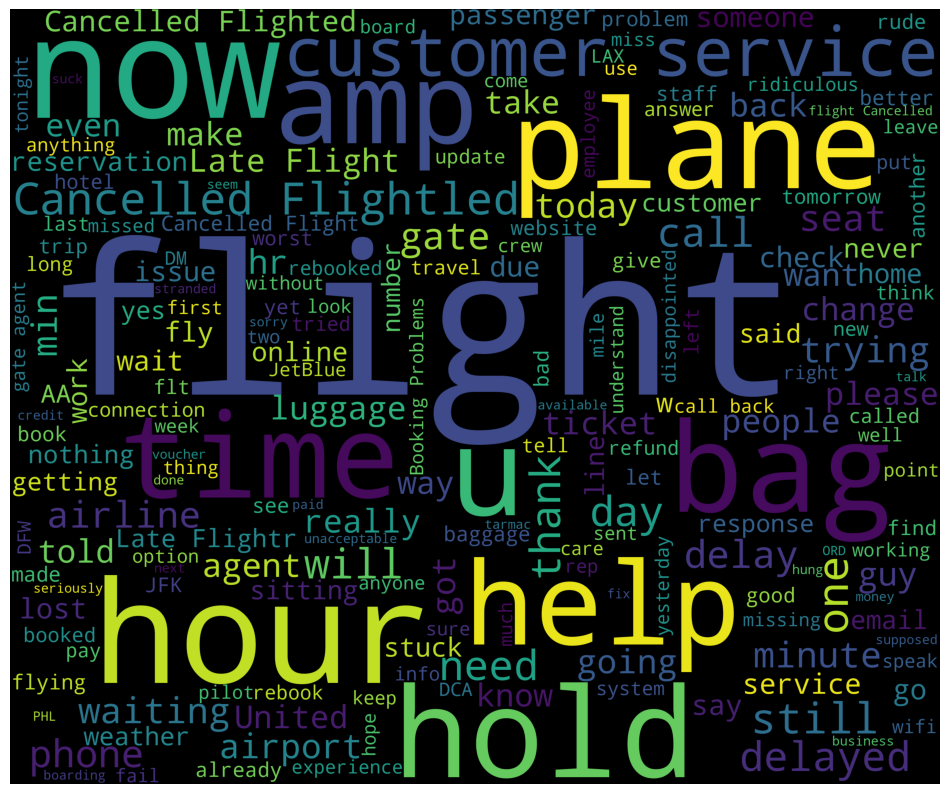

In [14]:
#visualize the frequent words for -ve
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

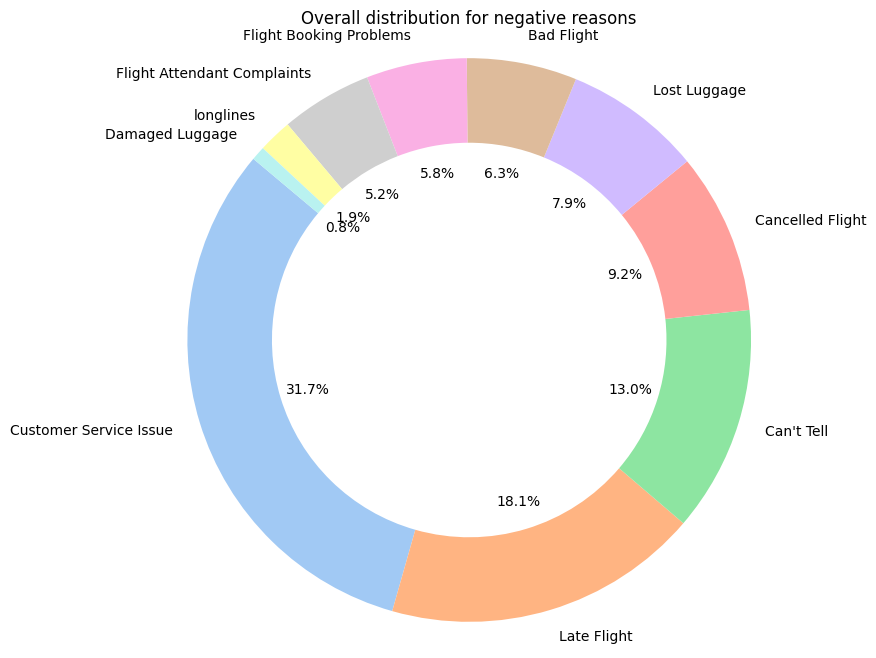

In [15]:
# Calculate the value counts for each negative reason
value_counts = df['negativereason'].value_counts()

# Create a donut-like pie chart using matplotlib and seaborn
plt.figure(figsize=(8, 8))
labels = value_counts.index
values = value_counts.values
colors = sns.color_palette('pastel')[0:len(labels)]  # Use pastel colors for the chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Overall distribution for negative reasons')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

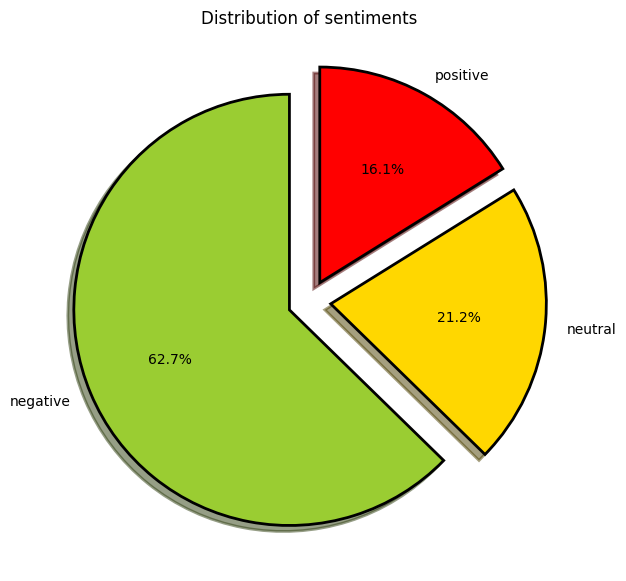

In [16]:
# pie chart visualization of airline_sentiment
fig= plt.figure(figsize=(7,7))
col=("yellowgreen", "gold", "red")
wp={'linewidth':2, 'edgecolor':"black"}
tags=df['airline_sentiment'].value_counts()
explode= (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=col, startangle=90, wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of sentiments')

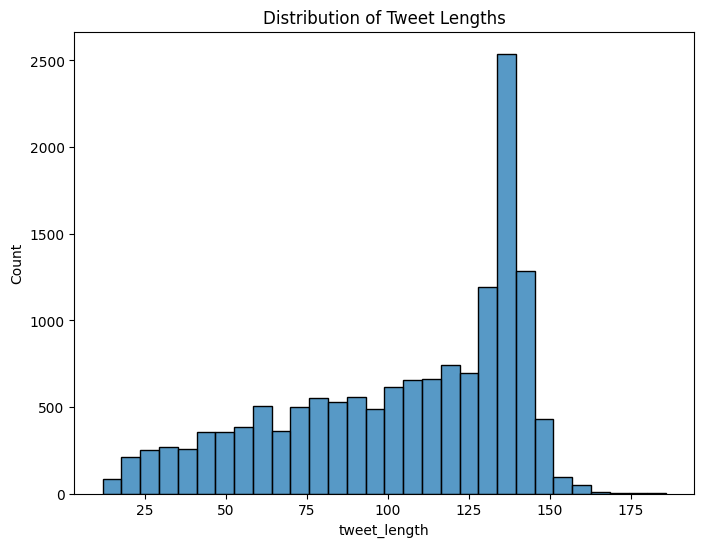

In [17]:
# Creating  column 'tweet_length'
df['tweet_length'] = df['text'].apply(len)
# Histogram of tweet lengths
plt.figure(figsize=(8,6))
sns.histplot(df['tweet_length'], bins=30)
plt.title('Distribution of Tweet Lengths')
plt.show()

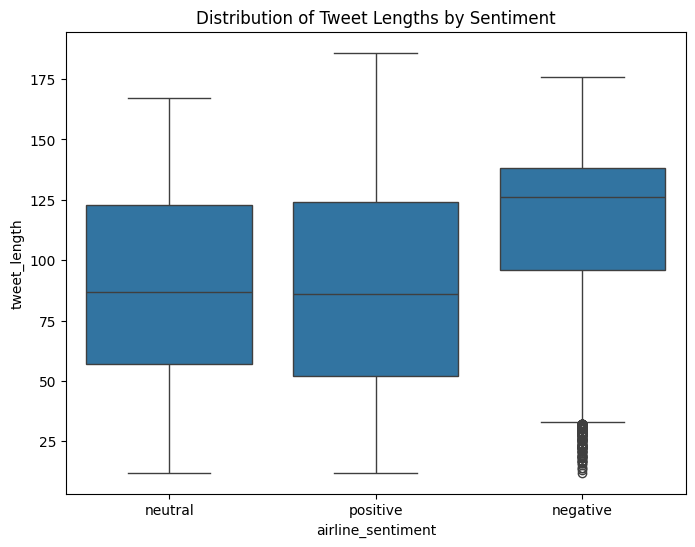

In [18]:
# Creating  column 'tweet_length'
df['tweet_length'] = df['text'].apply(len)

# Boxplot of tweet lengths
plt.figure(figsize=(8,6))
sns.boxplot(x='airline_sentiment', y='tweet_length', data=df)
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.show()

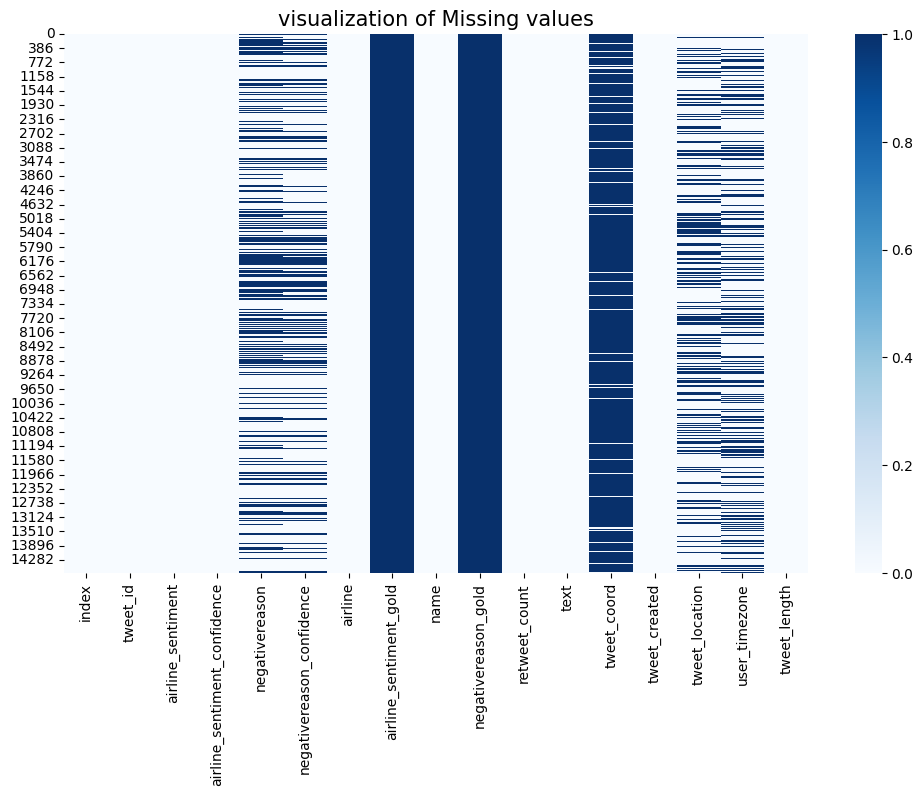

In [19]:
#Visualization of missing value of all columns using heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap = "Blues")                       
plt.title("visualization of Missing values", fontsize = 15)
plt.show()

# Model Development And Evaluation:

In [20]:
# importing necessary libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout
import pickle
from keras.preprocessing.text import Tokenizer
import itertools
import tensorflow as tf

In [121]:
df

,sentiment_label,tweets,value_label,cleaned_tweet
0,1,@VirginAmerica plus you've added commercials to the experience... tacky.,2,ad commerci experi tacki
1,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0,realli aggress blast obnoxi entertain guest face amp littl recours
2,0,@VirginAmerica and it's a really big bad thing about it,0,realli big bad thing
3,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,0,would pay flight seat play realli bad thing fli va
4,1,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",2,nearli everi time fli vx ear worm go away
...,...,...,...,...
11536,0,"@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday.",0,flight cancel flightl leav tomorrow morn auto rebook tuesday night flight need arriv monday
11537,0,@AmericanAir right on cue with the delays👌,0,cue delay
11538,1,@AmericanAir thank you we got on a different flight to Chicago.,2,got differ flight chicago
11539,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,0,minut late flight warn commun minut late flight call shitti custom svc


# 1. Random Forest:

In [160]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['sentiment_label'], test_size=0.2, random_state=42)

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Model Training
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [162]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [163]:
X_train.shape

(9232, 1817)

In [164]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
X_test.shape

(2309, 1817)

In [166]:
y_train
y_test

9193     0
6112     1
967      0
11279    0
3061     1
        ..
3887     1
5707     0
8855     0
10456    1
5015     0
Name: sentiment_label, Length: 2309, dtype: int64

In [167]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# model evaluation
def evaluate_model(y_test, y_pred):
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

y_pred = classifier.predict(X_test)
evaluate_model(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1862
           1       0.83      0.59      0.69       447

    accuracy                           0.90      2309
   macro avg       0.87      0.78      0.81      2309
weighted avg       0.89      0.90      0.89      2309



In [168]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1809   53]
 [ 184  263]]


In [169]:
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

Accuracy Score:
0.8973581637072325


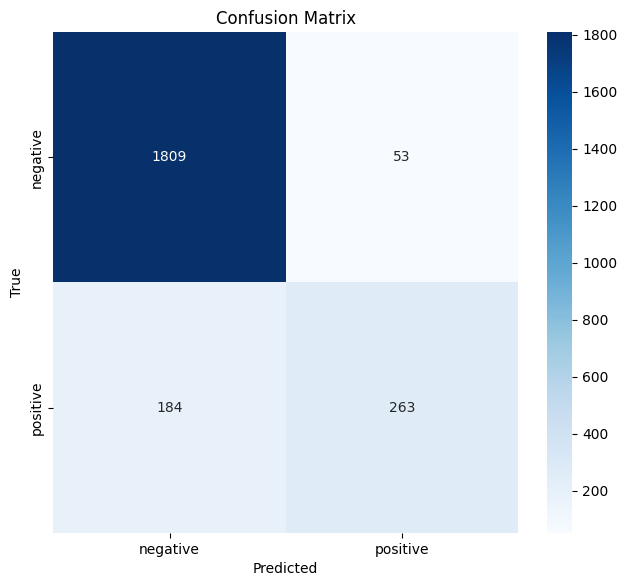

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=['negative', 'positive'], columns=['negative', 'positive'])
    plt.figure(figsize=(7.5, 6.5))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Make sure y_test and y_pred are correctly defined
plot_confusion_matrix(y_test, y_pred)

# 2. Long Short-Term Memory (LSTM):

In [21]:
# feature extraction
corpus = [df['cleaned_tweet'][i] for i in range( len(df))]

voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus] 

max_sent_length=max([len(i) for i in corpus])

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)
    
embedding_vector_features=40
# defining the model
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
#compile the model by using binary_crossentropy for loss function , adam optimizer, accuracy metrics for monitoring
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X_final=np.array(embedded_docs)
y_final=np.array(df['sentiment_label'])
X_final.shape,y_final.shape
#print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 113, 40)           200000    
                                                                 
 dropout (Dropout)           (None, 113, 40)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
lstm=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
121/121 [==============================] - 14s 97ms/step - loss: 0.4667 - accuracy: 0.8048 - val_loss: 0.3371 - val_accuracy: 0.8480
Epoch 2/10
121/121 [==============================] - 11s 95ms/step - loss: 0.2721 - accuracy: 0.8924 - val_loss: 0.2780 - val_accuracy: 0.8868
Epoch 3/10
121/121 [==============================] - 12s 101ms/step - loss: 0.2028 - accuracy: 0.9189 - val_loss: 0.2801 - val_accuracy: 0.8876
Epoch 4/10
121/121 [==============================] - 11s 93ms/step - loss: 0.1738 - accuracy: 0.9335 - val_loss: 0.2955 - val_accuracy: 0.8868
Epoch 5/10
121/121 [==============================] - 11s 93ms/step - loss: 0.1534 - accuracy: 0.9426 - val_loss: 0.3214 - val_accuracy: 0.8719
Epoch 6/10
121/121 [==============================] - 12s 100ms/step - loss: 0.1350 - accuracy: 0.9518 - val_loss: 0.3319 - val_accuracy: 0.8816
Epoch 7/10
121/121 [==============================] - 12s 99ms/step - loss: 0.1191 - accuracy: 0.9554 - val_loss: 0.3531 - val_accurac

In [23]:
y_test_pred=np.argmax(model.predict(X_test),axis=1)
y_train_pred=np.argmax(model.predict(X_train),axis=1)

242/242 [==============================] - 4s 15ms/step


In [26]:
print('Classification Report:')
print(classification_report(y_test,y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3037
           1       0.00      0.00      0.00       772

    accuracy                           0.80      3809
   macro avg       0.40      0.50      0.44      3809
weighted avg       0.64      0.80      0.71      3809



In [27]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_classes))

Confusion Matrix:
[[3037    0]
 [ 772    0]]


In [28]:
#model evalution
score = model.evaluate(X_test, y_test, verbose=False)
print("Accuracy Score:")
print(score[1])

Accuracy Score:
0.8718823790550232


120/120 [==============================] - 2s 15ms/step


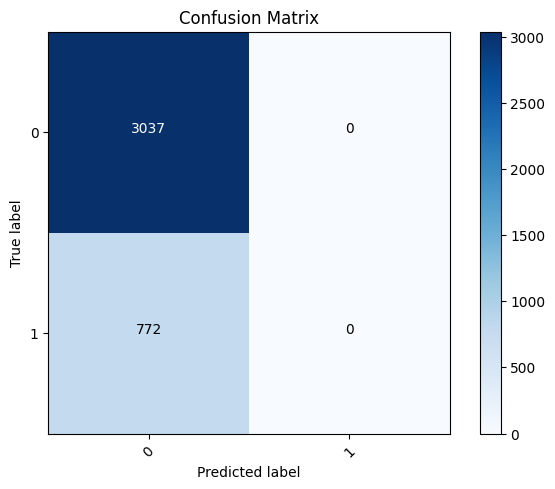

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
confusion_mtx = confusion_matrix(y_test, y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

# 3. Support Vector Machine (SVM):

In [175]:
# Splitting the data into training and testing sets
x = df.cleaned_tweet
y = df.sentiment_label
x_train, x_test, Y_train, Y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8655 9232
2886 2309


In [176]:
from sklearn.feature_extraction.text import CountVectorizer
# feature extraction
# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [177]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [178]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

In [179]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, Y_train)
#predicting output for test data 
# model evaluation
pred = model.predict(x_test_dtm)

In [180]:
print("Classification Report:")
print(classification_report(Y_test,pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2323
           1       0.70      0.70      0.70       563

    accuracy                           0.88      2886
   macro avg       0.81      0.81      0.81      2886
weighted avg       0.88      0.88      0.88      2886



In [181]:
#building confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, pred)
cm

Confusion Matrix:


array([[2154,  169],
       [ 171,  392]], dtype=int64)

In [182]:
#accuracy score
print("Accuracy Score:")
accuracy_score(Y_test,pred)

Accuracy Score:


0.8821898821898821

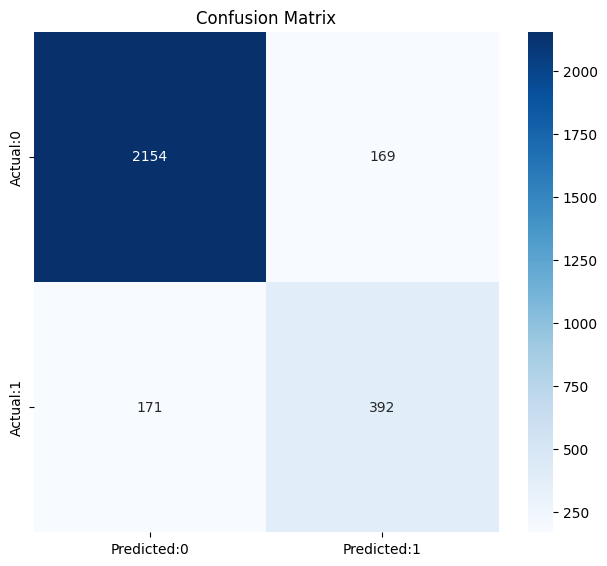

In [183]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [7.5,6.5]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.title ('Confusion Matrix', fontsize=12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [218]:
# Use the model on user input
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    # Convert the message to lower case
    text=text.lower()
    
    # Tokenize the message
    text=nltk.word_tokenize(text)
    
    # Remove the special characters in the message
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    # Remove the stop words and punctuations in the message
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    # Stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

user_text = input('Input the text: ')
preprocessed_text=transform_text(user_text)
vectorized_text=vect.transform([preprocessed_text]).toarray()

pred = model.predict(vectorized_text)
if pred > 0.8:
    print('Positive')
elif pred > 0.5:
    print('Neutral')
else:
    print('Negative')

Input the text:  @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.	


Positive


In [203]:
# Use the model on user input
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    # Convert the message to lower case
    text=text.lower()
    
    # Tokenize the message
    text=nltk.word_tokenize(text)
    
    # Remove the special characters in the message
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    # Remove the stop words and punctuations in the message
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    # Stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

user_text = input('Input the text: ')
preprocessed_text=transform_text(user_text)
vectorized_text=vect.transform([preprocessed_text]).toarray()

pred = model.predict(vectorized_text)
if pred > 0.8:
    print('Positive')
elif pred > 0.5:
    print('Neutral')
else:
    print('Negative')

Input the text:  @VirginAmerica I can't check in or add a bag. Your website isn't working. I've tried both desktop and mobile http://t.co/AvyqdMpi1Y


Negative
